In [225]:
from db_utils import DataTransform, DataFrameInfo, DataFrameTransform, Plotter, load_local_df
import pandas as pd


In [226]:

pd.set_option('display.max_columns', None)
cust_loans_df = pd.read_csv('loan_payments.csv', index_col='id')
cust_loans_df

,Unnamed: 0,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38676116,0,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
38656203,1,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
38656154,2,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
38656128,3,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
38656121,4,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76597,54226,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,Jul-2013,Fully Paid,n,other,10.00,2,Apr-2003,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
142608,54227,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,Oct-2013,Fully Paid,n,other,24.40,0,Jan-1999,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
117045,54228,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,Aug-2013,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,Feb-1984,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL


In [227]:
# removing the empty column

cust_loans_df.drop("Unnamed: 0", axis=1, inplace=True)

In [228]:
# converting to datetime

data_transform = DataTransform(cust_loans_df)
data_transform.convert_to_datetime('last_payment_date')
data_transform.convert_to_datetime('next_payment_date')
data_transform.convert_to_datetime('last_credit_pull_date')  
data_transform.convert_to_datetime('earliest_credit_line')
data_transform.convert_to_datetime('issue_date')
  

c:\Users\dmitr\PycharmProjects\AiCore-Loan-Analysis\db_utils.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col_name] = self.df[col_name].str.extract('(\d+)').astype(float)
c:\Users\dmitr\PycharmProjects\AiCore-Loan-Analysis\db_utils.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col_name] = self.df[col_name].str.extract('(\d+)').astype(float)
c:\Users\dmitr\PycharmProjects\AiCore-Loan-Analysis\db_utils.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col_name] = self.df[col_name].str.extract('(\d+)').astype(float)
c:\Users\dmitr\Pych

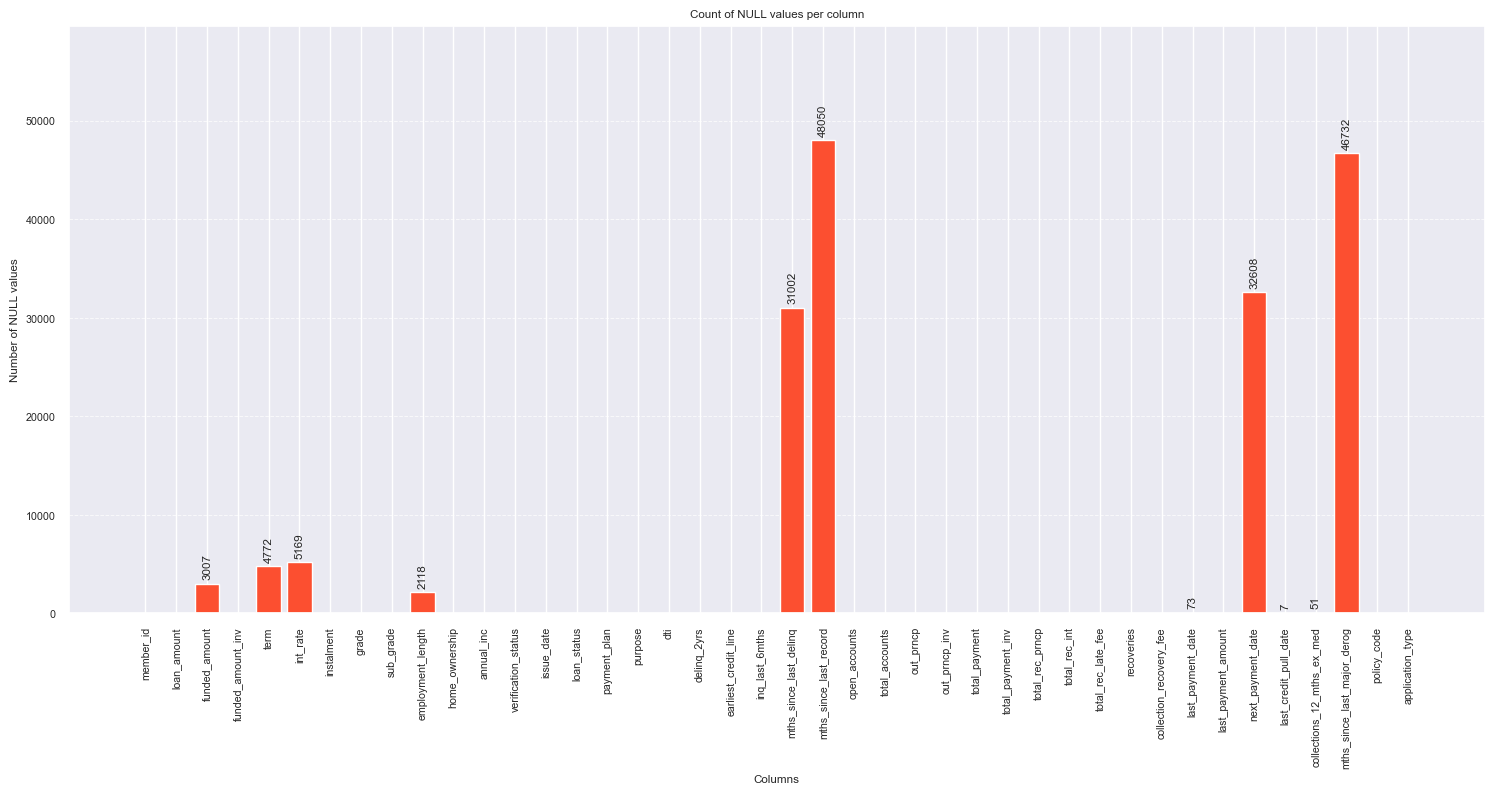

In [229]:
plotter = Plotter()
plotter.plot_missing_values(cust_loans_df)

In [230]:
# filling NaN with relevant values

cust_loans_df['mths_since_last_delinq'].fillna(999, inplace=True)
cust_loans_df['mths_since_last_major_derog'].fillna(999, inplace=True)
cust_loans_df['next_payment_date'].fillna('No Payment Due', inplace=True)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_25788\1729540697.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Payment Due' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  cust_loans_df['next_payment_date'].fillna('No Payment Due', inplace=True)


In [231]:
# dropping two columns
columns_to_drop = ['mths_since_last_record','funded_amount']
cust_loans_df.drop(columns=columns_to_drop, inplace=True)

In [232]:
# dropping rows in the columns with small amount of NaN
column_names = ['last_payment_date','last_credit_pull_date','collections_12_mths_ex_med']
cust_loans_df.dropna(subset=column_names, inplace=True)

In [233]:
# imputing int_rate with median
dataframe_transform=DataFrameTransform(cust_loans_df)
dataframe_transform.impute_missing_values('int_rate',method='median')

In [234]:
# ordinally encoding the 'term' column 
term_mapping = {'36 months': 36, '60 months': 60}
cust_loans_df['term'] = cust_loans_df['term'].map(term_mapping)

# imputing missing values with median
dataframe_transform.impute_missing_values('term',method='median')


In [235]:
# ordinally encoding the 'employment_length' column 
employment_mapping = {'5 years': 5, '9 years':9, '8 years':8, '1 year':1, '10+ years':15, '< 1 year':0.5,
       '7 years':7, '3 years':3, '4 years':4, '6 years':6, '2 years':2}
cust_loans_df['employment_length'] = cust_loans_df['employment_length'].map(employment_mapping)

# imputing missing values with mean
dataframe_transform.impute_missing_values('employment_length',method='mean')

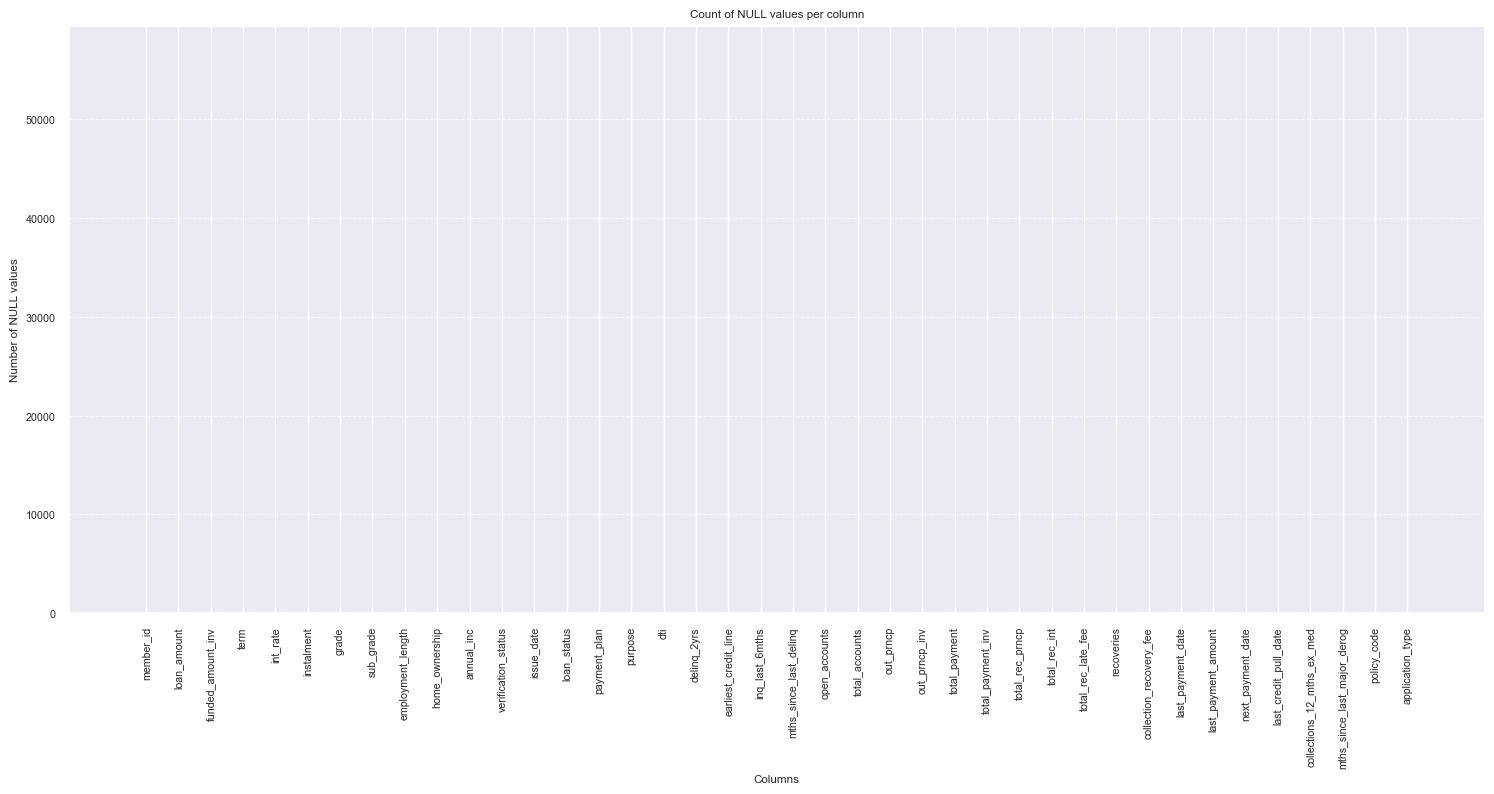

In [236]:
plotter.plot_missing_values(cust_loans_df)

In [237]:
cust_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 38676116 to 142608
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   member_id                    54100 non-null  int64         
 1   loan_amount                  54100 non-null  int64         
 2   funded_amount_inv            54100 non-null  float64       
 3   term                         54100 non-null  float64       
 4   int_rate                     54100 non-null  float64       
 5   instalment                   54100 non-null  float64       
 6   grade                        54100 non-null  object        
 7   sub_grade                    54100 non-null  object        
 8   employment_length            54100 non-null  float64       
 9   home_ownership               54100 non-null  object        
 10  annual_inc                   54100 non-null  float64       
 11  verification_status          54100 non

In [238]:

# Instantiate DataFrameInfo and count NaN
df_info = DataFrameInfo(cust_loans_df)
df_info.count_nan()

,count_nan,percent_nan
member_id,0,0.0
loan_amount,0,0.0
funded_amount_inv,0,0.0
term,0,0.0
int_rate,0,0.0
instalment,0,0.0
grade,0,0.0
sub_grade,0,0.0
employment_length,0,0.0
home_ownership,0,0.0


In [239]:
# Find skewness for numeric columns
numeric_cols = cust_loans_df.select_dtypes(include=['number'])
skewness = numeric_cols.skew()
print(skewness.sort_values(ascending=False))

collection_recovery_fee        27.794716
collections_12_mths_ex_med     20.298064
recoveries                     14.382675
total_rec_late_fee             13.258472
annual_inc                      8.735737
delinq_2yrs                     5.318818
inq_last_6mths                  3.243836
last_payment_amount             2.496079
out_prncp_inv                   2.352946
out_prncp                       2.352526
member_id                       2.204549
total_rec_int                   2.203625
total_payment                   1.269266
total_rec_prncp                 1.262007
total_payment_inv               1.258474
term                            1.146332
open_accounts                   1.059493
instalment                      0.996150
funded_amount_inv               0.814251
loan_amount                     0.804312
total_accounts                  0.780083
int_rate                        0.456055
employment_length               0.408201
dti                             0.189020
policy_code     

c:\Users\dmitr\PycharmProjects\AiCore-Loan-Analysis\db_utils.py:273: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ax.text(0.95, 0.95, f"Skew: {skew_val:.2f}",


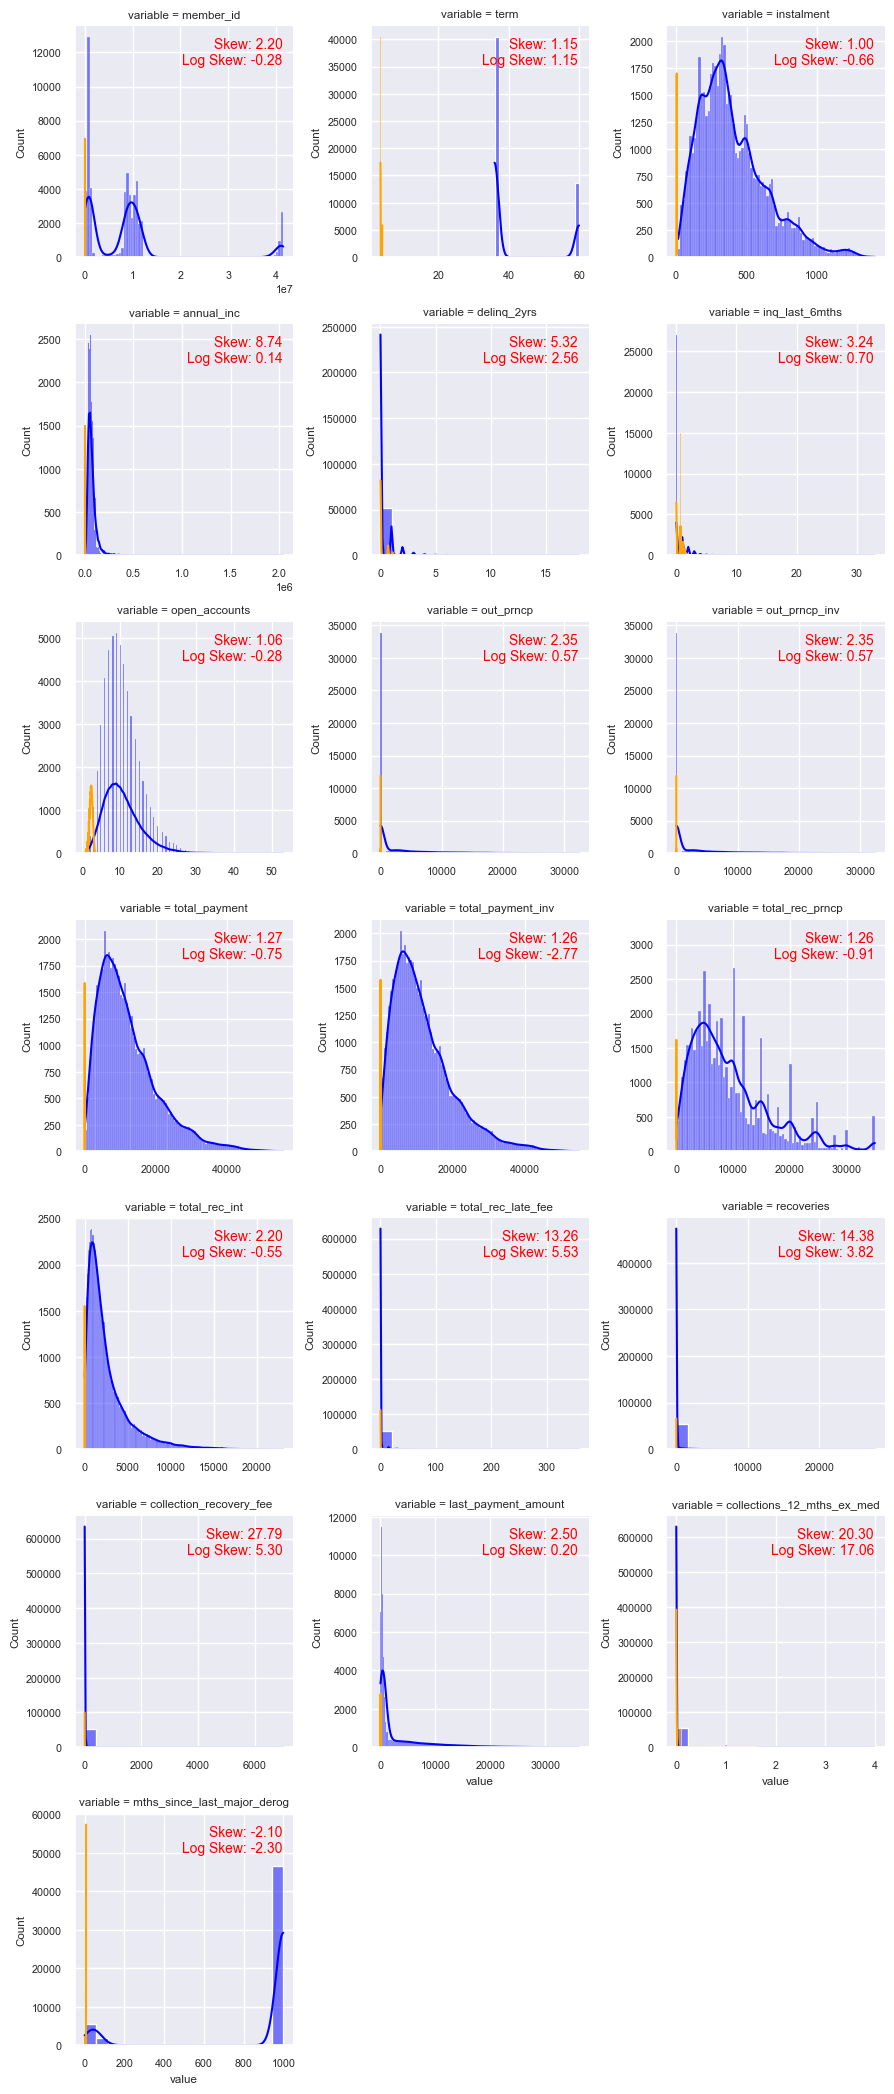

In [240]:
skewed_cols = skewness[skewness.abs()> 0.99].index.tolist()
plotter.plot_skewedness_with_log(cust_loans_df, skewed_cols)

In [241]:
# columns_to_sqrt_transform = ['total_payment_inv','collections_12_mths_ex_med']
# sqrt_transformed = dataframe_transform.sqrt_transform(columns_to_sqrt_transform)
# column_skewness = sqrt_transformed[columns_to_sqrt_transform].skew()
# column_skewness

In [242]:
# creating two copies of the dataframe - one for the log-transform experiments and one clean one 

cust_loans_df_copy = cust_loans_df.copy()
cust_loans_df_log_transformed_copy = cust_loans_df_copy.copy()
dataframe_transform_copy = DataFrameTransform(cust_loans_df_copy)
dataframe_log_transform_copy = DataFrameTransform(cust_loans_df_log_transformed_copy)


In [243]:
# checking open_accounts for original data
cust_loans_df_copy['open_accounts'].value_counts()

open_accounts
9     5133
8     5063
10    4838
7     4724
11    4412
6     4070
12    3778
13    3197
5     2988
14    2649
15    2139
4     1913
16    1683
17    1382
3     1086
18    1081
19     843
20     638
21     498
2      408
22     406
23     268
24     241
25     185
26     115
27      80
28      57
29      39
1       32
30      31
31      30
32      17
33      16
34      15
35       8
39       8
41       5
43       4
38       4
36       4
42       3
37       3
53       1
46       1
48       1
51       1
40       1
47       1
Name: count, dtype: int64

In [244]:
# applying log_transform and getting a copy of a dataframe

columns_to_log_transform = [
    'annual_inc',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_accounts',
    'out_prncp',
    'out_prncp_inv',
    'total_payment',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_payment_amount',
    'collections_12_mths_ex_med'
    ]


cust_loans_df_log_transformed = dataframe_log_transform_copy.log_transform(columns_to_log_transform)

c:\Users\dmitr\PycharmProjects\AiCore-Loan-Analysis\db_utils.py:426: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  plt.ylabel('Frequency')


In [245]:
transformed_df_info = DataFrameInfo(cust_loans_df_log_transformed)

In [246]:
transformed_df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 38676116 to 142608
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   member_id                    54100 non-null  int64         
 1   loan_amount                  54100 non-null  int64         
 2   funded_amount_inv            54100 non-null  float64       
 3   term                         54100 non-null  float64       
 4   int_rate                     54100 non-null  float64       
 5   instalment                   54100 non-null  float64       
 6   grade                        54100 non-null  object        
 7   sub_grade                    54100 non-null  object        
 8   employment_length            54100 non-null  float64       
 9   home_ownership               54100 non-null  object        
 10  annual_inc                   54100 non-null  float64       
 11  verification_status          54100 non

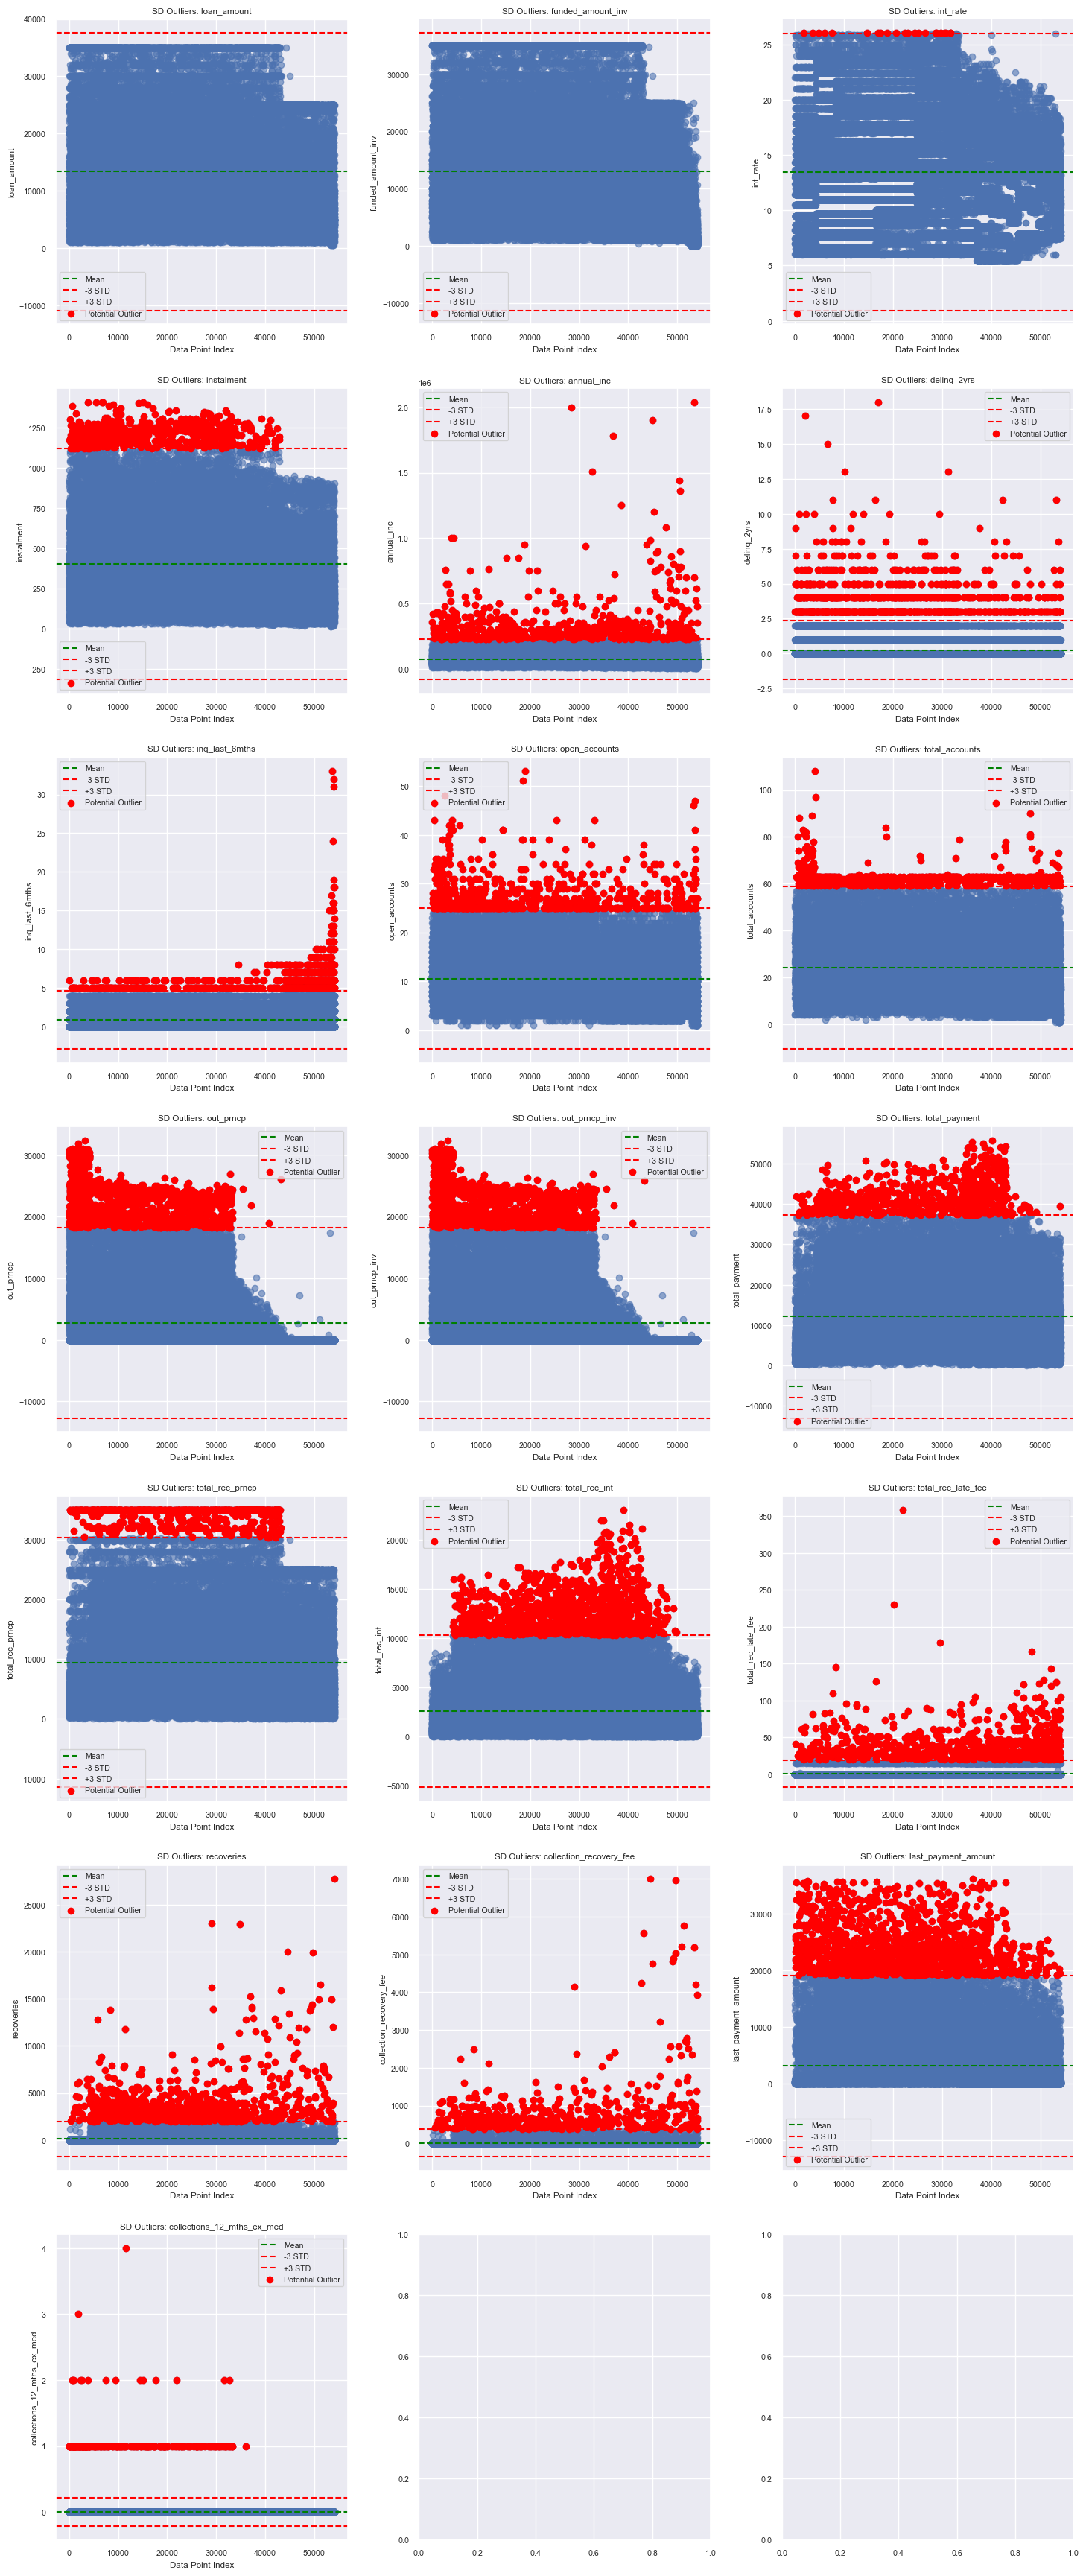

In [247]:
# Checking dataframe for outliers

columns_to_check = [
    'loan_amount',
    'funded_amount_inv',
    'int_rate',
    'instalment',
    'annual_inc',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_accounts',
    'total_accounts',
    'out_prncp',
    'out_prncp_inv',
    'total_payment',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_payment_amount',
    'collections_12_mths_ex_med'
    ]

plotter.plot_std_dev_outliers(cust_loans_df_copy, columns_to_check)

In [248]:
# Columns of interest
columns_of_interest = ['annual_inc']

df_info_copy=DataFrameInfo(cust_loans_df_copy)
df_info_copy.column_info(columns_of_interest)

Column: annual_inc
The IQR range for annual_inc is: 0.00 - 147500.00
Median: 61052.5
The IQR range for non-zero data in annual_inc is: 0.00 - 147500.00
Median for non-zero data: 61052.5
Outliers for annual_inc: id
423315      147996.0
8645580     148000.0
7617477     148000.0
9855902     148000.0
525456      148000.0
             ...    
7726670    1510000.0
884755     1782000.0
611872     1900000.0
8664782    2000000.0
269818     2039784.0
Name: annual_inc, Length: 2767, dtype: float64
Number of outliers: 2767
Percentage of outliers: 5.11%



In [249]:
len(cust_loans_df_copy)

54100

In [250]:
dataframe_transform_copy.remove_custom_outliers('annual_inc', upper_bound=1600000)
dataframe_transform_copy.remove_custom_outliers('total_accounts', upper_bound=96)
dataframe_transform_copy.remove_custom_outliers('inq_last_6mths', upper_bound=20)
dataframe_transform_copy.remove_custom_outliers('total_rec_late_fee', upper_bound=200)
dataframe_transform_copy.remove_custom_outliers('total_accounts', upper_bound=96)
dataframe_transform_copy.remove_custom_outliers('recoveries', upper_bound=24000)

cust_loans_df_copy = dataframe_transform_copy.df




In [251]:
len(cust_loans_df_copy)

54087

In [252]:
# Columns of interest
columns_of_interest = ['annual_inc']


for column in columns_of_interest:
      # Calculate the Q1, Q3, and IQR
      Q1_full = cust_loans_df_copy[column].quantile(0.25)
      Q3_full = cust_loans_df_copy[column].quantile(0.75)
      IQR_full = Q3_full - Q1_full

      # Define the bounds for outliers
      lower_bound_full = Q1_full - 1.5 * IQR_full
      upper_bound_full = Q3_full + 1.5 * IQR_full

      # Adjust lower bounds to be non-negative for full data
      lower_bound_full = max(lower_bound_full, 0)
      
      # Now calculate IQR for non-zero data
      # Filter out zeros from the column
      non_zero_data = cust_loans_df_copy[cust_loans_df_copy[column] > 0]

      # Calculate Q1, Q3, and IQR for non-zero data
      Q1_non_zero = non_zero_data[column].quantile(0.25)
      Q3_non_zero = non_zero_data[column].quantile(0.75)
      IQR_non_zero = Q3_non_zero - Q1_non_zero
      
      # Define the bounds for outliers
      lower_bound_non_zero = Q1_non_zero - 1.5 * IQR_non_zero
      upper_bound_non_zero = Q3_non_zero + 1.5 * IQR_non_zero
      
      # Adjust lower bounds to be non-negative for non-zero data
      lower_bound_non_zero = max(lower_bound_non_zero, 0)
      
      # Find outliers for full data
      outliers_condition_full = ((cust_loans_df_copy[column] < lower_bound_full) |
                              (cust_loans_df_copy[column] > upper_bound_full))
      outliers_data_full = cust_loans_df_copy[column][outliers_condition_full].sort_values()
      
      print(f"Column: {column}\n"
            f"The IQR range for full data {column} is: "
            f"{lower_bound_full:.2f} - {upper_bound_full:.2f}\n"
            f"Median for full data: {cust_loans_df_copy[column].quantile(0.50)}\n"
            f"The IQR range for non-zero data {column} is: "
            f"{lower_bound_non_zero:.2f} - {upper_bound_non_zero:.2f}\n")
      
            

      print(f"Outliers for {column}:")
      print(outliers_data_full)
      print(f"Number of outliers for {column}: {outliers_data_full.shape[0]}")
      print(f"Percentage of outliers for {column}: {outliers_data_full.shape[0]*100/cust_loans_df_copy.shape[0]: .2f}\n")

Column: annual_inc
The IQR range for full data annual_inc is: 0.00 - 147500.00
Median for full data: 61023.0
The IQR range for non-zero data annual_inc is: 0.00 - 147500.00

Outliers for annual_inc:
id
423315      147996.0
8645580     148000.0
311148      148000.0
724256      148000.0
9777556     148000.0
             ...    
603818     1200000.0
830027     1250000.0
453667     1362000.0
458760     1440000.0
7726670    1510000.0
Name: annual_inc, Length: 2760, dtype: float64
Number of outliers for annual_inc: 2760
Percentage of outliers for annual_inc:  5.10



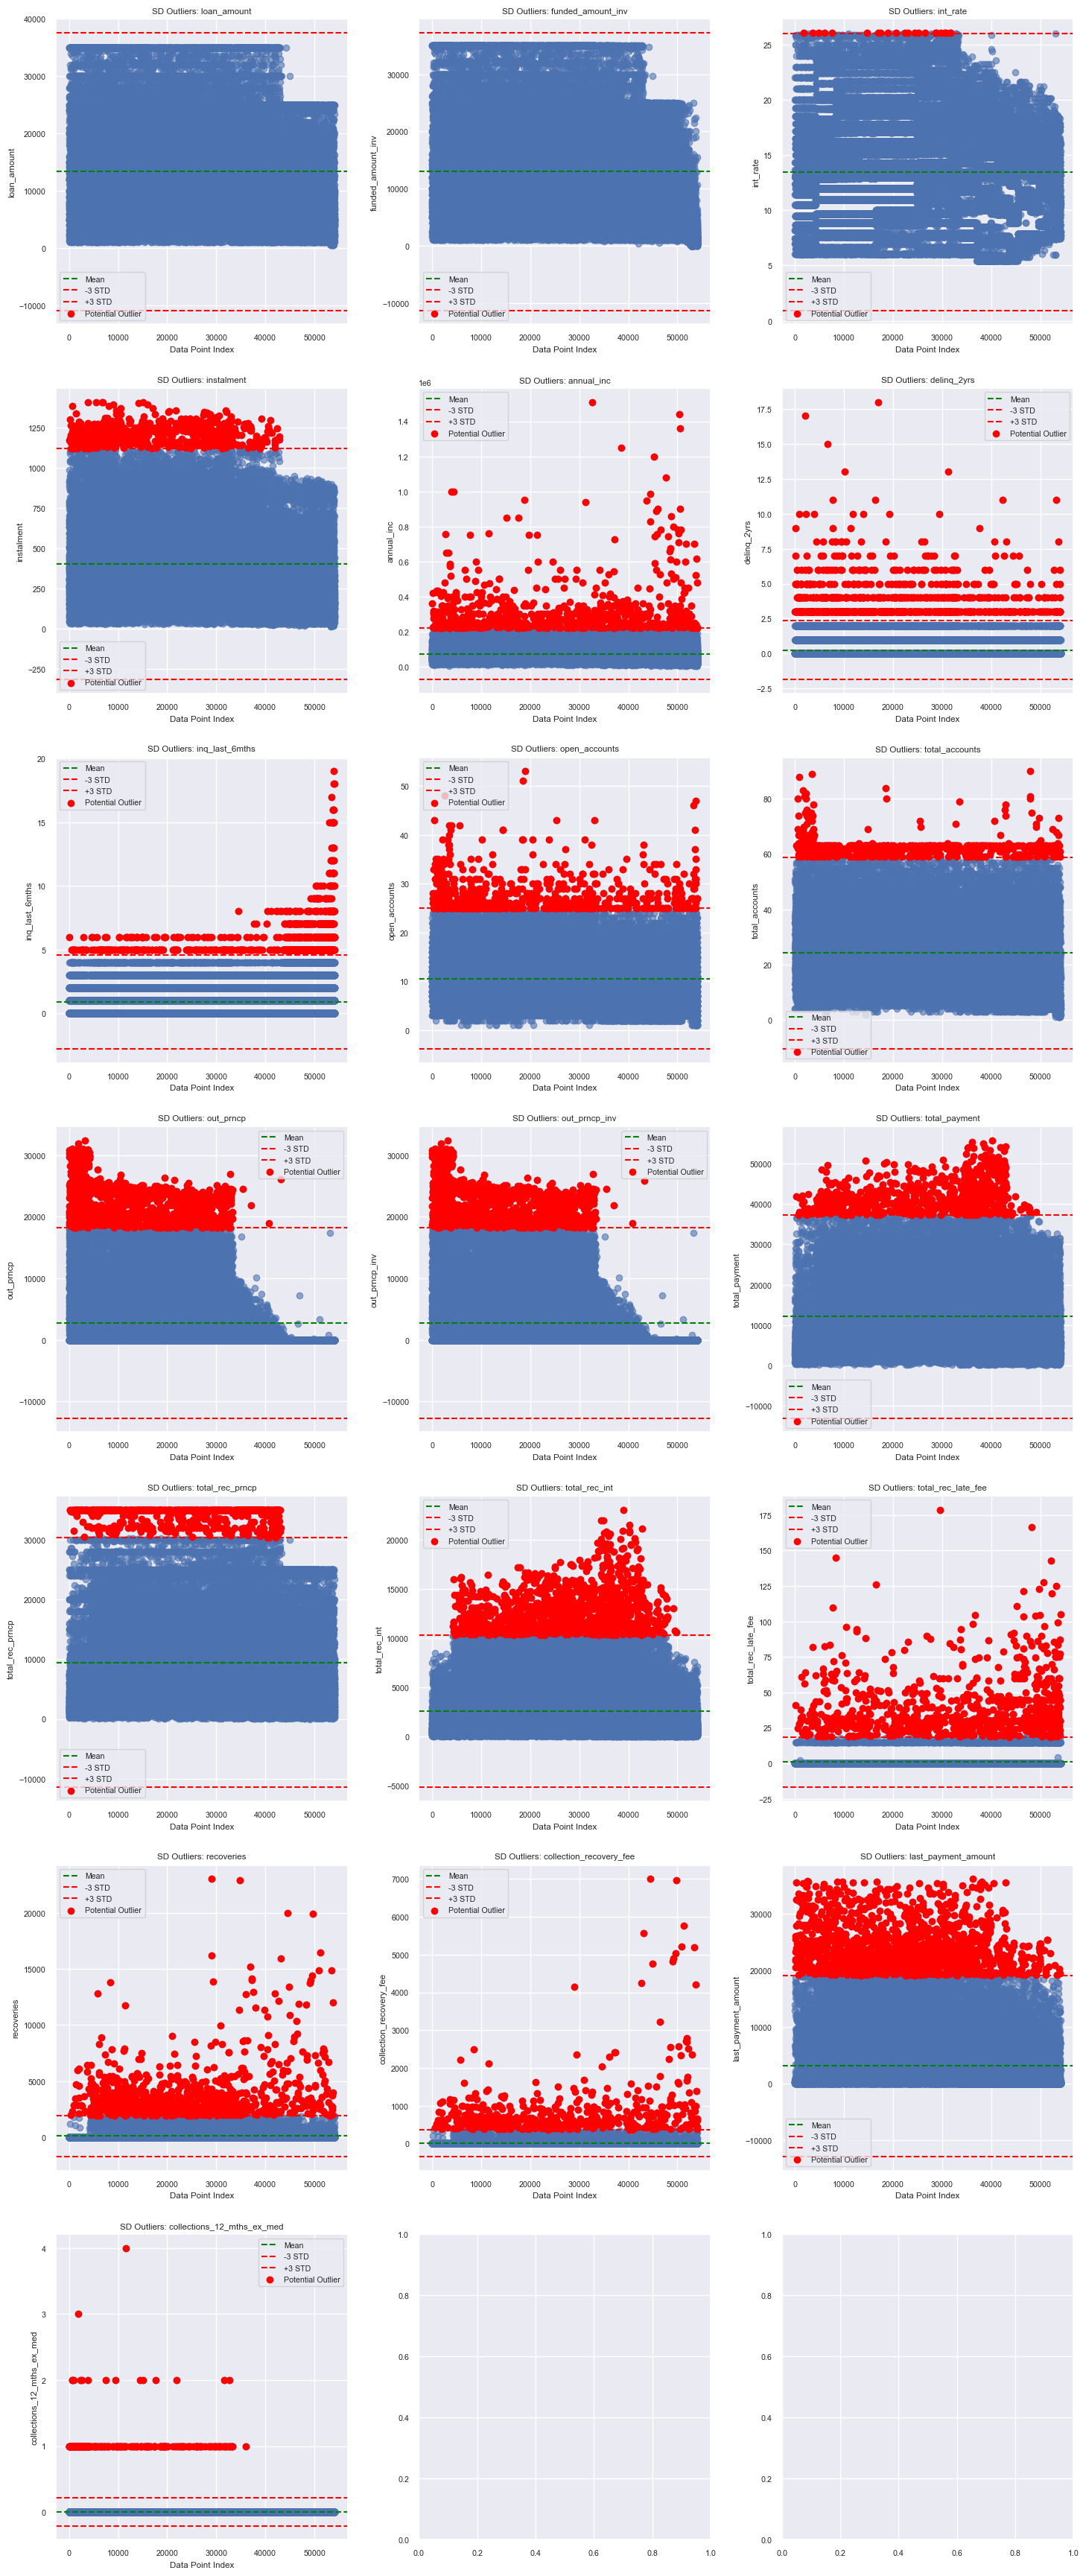

In [253]:
plotter.plot_std_dev_outliers(cust_loans_df_copy, columns_to_check)

In [254]:
cust_loans_df[cust_loans_df['collection_recovery_fee']>0]['collection_recovery_fee'].value_counts()

collection_recovery_fee
1.4400      7
4.0200      6
2.0800      6
3.7100      6
3.2000      6
           ..
506.8728    1
75.6270     1
2.7103      1
2.1780      1
444.2500    1
Name: count, Length: 2907, dtype: int64

In [255]:
numeric_df_copy = cust_loans_df_copy.select_dtypes(include=['number'])
numeric_df_info_copy = DataFrameInfo(numeric_df_copy)
numeric_df_info_copy.column_correlation('total_rec_prncp')


total_rec_prncp        1.000000
total_payment          0.956209
total_payment_inv      0.936537
instalment             0.715944
loan_amount            0.691000
funded_amount_inv      0.671339
last_payment_amount    0.665189
total_rec_int          0.440560
annual_inc             0.320173
total_accounts         0.182217
Name: total_rec_prncp, dtype: float64


In [256]:
numeric_df_info_copy.column_correlation('total_payment')

total_payment          1.000000
total_payment_inv      0.981915
total_rec_prncp        0.956209
loan_amount            0.804177
instalment             0.798913
funded_amount_inv      0.785207
total_rec_int          0.676002
last_payment_amount    0.569427
annual_inc             0.341091
term                   0.216219
Name: total_payment, dtype: float64


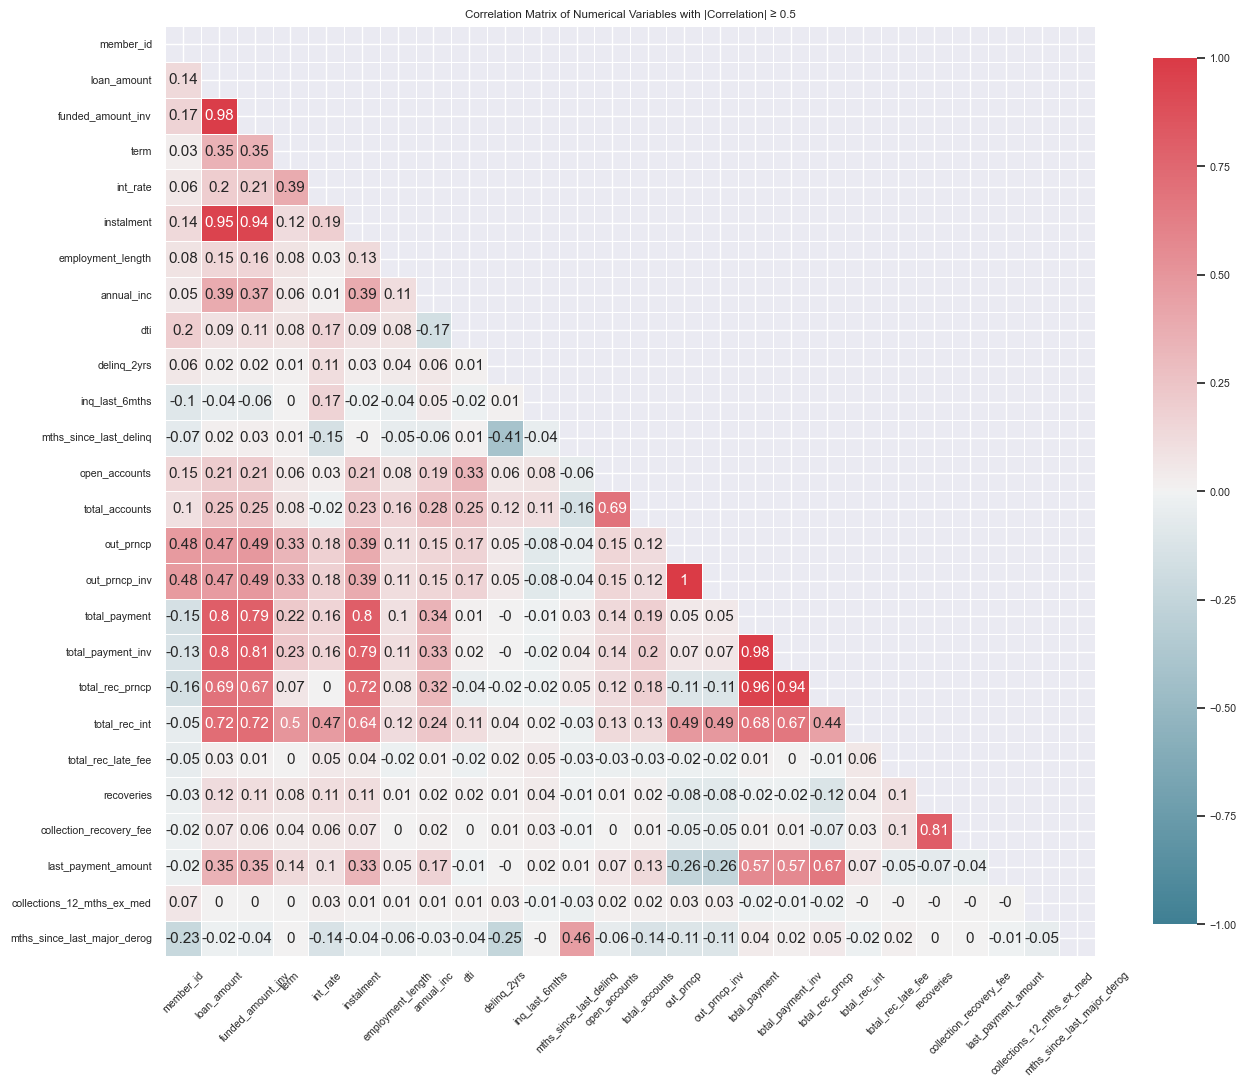

In [257]:

numeric_df_info_copy.plot_correlation_matrix()

In [258]:
# dropping highly correlated columns
columns_to_drop = ['out_prncp_inv','instalment','total_payment_inv','total_rec_prncp']
cust_loans_df_copy.drop(columns=columns_to_drop, inplace=True)

In [1]:
# creating another correlation matrix after dropping the columns above
numeric_df_copy = cust_loans_df_copy.select_dtypes(include=['number'])
numeric_df_info_copy = DataFrameInfo(numeric_df_copy)
numeric_df_info_copy.plot_correlation_matrix()

NameError: name 'cust_loans_df_copy' is not defined

In [263]:
# saving dataframe with the amendments
cust_loans_df_copy.to_csv('loan_payments_cleaned.csv', index=False)

In [265]:
cust_loans_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54087 entries, 38676116 to 142608
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   member_id                    54087 non-null  int64         
 1   loan_amount                  54087 non-null  int64         
 2   funded_amount_inv            54087 non-null  float64       
 3   term                         54087 non-null  float64       
 4   int_rate                     54087 non-null  float64       
 5   grade                        54087 non-null  object        
 6   sub_grade                    54087 non-null  object        
 7   employment_length            54087 non-null  float64       
 8   home_ownership               54087 non-null  object        
 9   annual_inc                   54087 non-null  float64       
 10  verification_status          54087 non-null  object        
 11  issue_date                   54087 non